In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
from scipy import interpolate

### Read in data

In [3]:
# later time step
nn = 350
# step interval
dn = 10

filename1=('./ptcls_info_t%3.3d.dat')%(nn)
x1,y1,vx1,vy1,vz1,m1,pe1=np.loadtxt(filename1,usecols=[0,1,2,3,4,5,6],unpack=True)
filename2=('./ptcls_info_t%3.3d.dat')%(nn+dn)
x2,y2,vx2,vy2,vz2,m2,pe2=np.loadtxt(filename2,usecols=[0,1,2,3,4,5,6],unpack=True)
datname=('./frqs_info_t%3.3d.dat')%(nn)
m_rad, m_omega, m_kappa, m_kappaz=np.loadtxt(datname,usecols=[1,2,3,4],unpack=True)

# Oort Constant (BT Eq 3.84)
r1 = [np.sqrt(x1[i]**2 + y1[i]**2) for i in range(len(x1))]
r2 = [np.sqrt(x2[i]**2 + y2[i]**2) for i in range(len(x2))]

# interpolation
fomega = interpolate.interp1d(m_rad, m_omega, kind='linear', bounds_error=False, fill_value=(0.,max(m_rad)))
fkappa = interpolate.interp1d(m_rad, m_kappa, kind='linear', bounds_error=False, fill_value=(0.,max(m_rad)))

omega = fomega(r1)
kappa = fkappa(r1)

# Oort Constant
B = [kappa[i]**2/(-4.*omega[i]) for i in range(len(x1))]
A = [B[i] + omega[i] for i in range(len(x1))]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


NameError: name 'ke1' is not defined

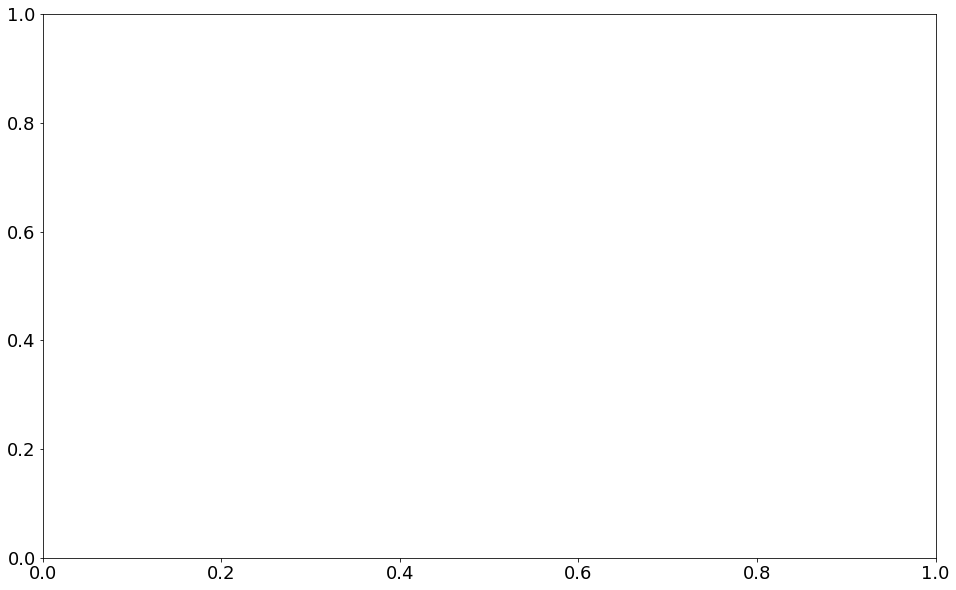

In [4]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(pe1, ke1*m1, s=5)

ax = plt.gca()
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('Energy',fontdict=font)

#title
titleStr='Energy distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
#figname2='./output/Te_R_t'+str(nn-dn)+'.png'
#plt.savefig(figname2)

In [ ]:
## lets print all the parameters!